In [1]:
import yfinance as yf

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import pandas_datareader as web

In [6]:
import statsmodels.api as sm

In [7]:
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date

In [8]:
stock = 'fb'

short_moving_average_span = 20
long_moving_average_span = 50
cutoff=0.50
invest = 100
years_of_data_to_process = 25

In [9]:
currentDateTime = datetime.datetime.now()
date = currentDateTime.date()
print (date)
year = date.strftime("%Y")
start_year =  int(year) - years_of_data_to_process
start = datetime.datetime(start_year, 1, 1)

2021-06-19


In [10]:
data =  yf.download(stock, start=start)

[*********************100%***********************]  1 of 1 completed


In [11]:
#data = web.DataReader(stock, data_source='yahoo', start = start, end = '2008-7-14')

In [12]:
df = data["Close"].pct_change() * 100

In [13]:
df = df.rename("Today_Change_%")
df = df.reset_index()

In [14]:
df1 = pd.merge(data,df, on="Date")
#df1

In [15]:
df1.insert(7,'Volume_Lag', None)
df1['Volume_Lag'] = df1.Volume.shift(1).values/1000000000
df1.Volume = df1.Volume/1000000000

In [16]:
df1["Trend"] =  (df1["Close"] - df1["Low"])/ ((df1["High"] - df1["Low"]))

In [17]:
df1["Trend_Lag"] = df1["Trend"].shift(1)

In [18]:
df1['Close-Open'] =  df1['Close'] - df1['Open']
df1['Close-Open_Lag'] = df1['Close-Open'].shift(1)

In [19]:
df1['High-Low'] =  df1['High'] - df1['Low']
df1['High-Low_Lag'] = df1['High-Low'].shift(1)

In [20]:
df1 = sm.add_constant(df1)
df1["Up_Down"] = [1 if (i > 0) else 0 for i in df1["Today_Change_%"]]

In [21]:
df1.dropna(inplace= True)

In [22]:
df1['Short_MV_Avg_Span'] = df1['Close'].ewm(span=short_moving_average_span, adjust=False).mean()
df1.dropna(inplace= True)
#df1

In [23]:
df1['Long_MV_Avg_Span'] = df1['Close'].ewm(span=long_moving_average_span, adjust=False).mean()
df1.dropna(inplace= True)
#df1

In [24]:
df1['Short_MV_Avg_Span-Long_MV_Avg_Span'] = df1.Short_MV_Avg_Span - df1.Long_MV_Avg_Span
df1['Short_MV_Avg_Span-Long_MV_Avg_Span_Lag'] = df1['Short_MV_Avg_Span-Long_MV_Avg_Span'].shift(1)
#df1

In [25]:
#crossovers = pd.DataFrame()
#crossovers['Dates'] = Short_MV_Avg_Span['Date']
#crossovers['Price'] = [i for i in df1.Close]
#crossovers['Short_MV_Avg_Span'] = Short_MV_Avg_Span['Close']
#crossovers['Long_MV_Avg_Span'] = Long_MV_Avg_Span['Close']
#crossovers

In [26]:
df1.dropna(inplace= True)
df1

,const,Date,Open,High,Low,Close,Adj Close,Volume,Volume_Lag,Today_Change_%,...,Trend_Lag,Close-Open,Close-Open_Lag,High-Low,High-Low_Lag,Up_Down,Short_MV_Avg_Span,Long_MV_Avg_Span,Short_MV_Avg_Span-Long_MV_Avg_Span,Short_MV_Avg_Span-Long_MV_Avg_Span_Lag
2,1.0,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,0.101787,0.168193,-8.903905,...,0.281420,-1.610001,-2.500000,2.650000,3.660000,0,33.741427,33.911175,-0.169748,0.000000
3,1.0,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,0.073600,0.101787,3.225806,...,0.022641,0.629999,-1.610001,1.139999,2.650000,1,33.575577,33.836227,-0.260650,-0.169748
4,1.0,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,0.050237,0.073600,3.218746,...,0.561403,0.079998,0.629999,1.439999,1.139999,1,33.523617,33.804610,-0.280993,-0.260650
5,1.0,2012-05-25,32.900002,32.950001,31.110001,31.910000,31.910000,0.037150,0.050237,-3.390854,...,0.875000,-0.990002,0.079998,1.840000,1.439999,0,33.369940,33.730312,-0.360372,-0.280993
6,1.0,2012-05-29,31.480000,31.690001,28.650000,28.840000,28.840000,0.078063,0.037150,-9.620808,...,0.434782,-2.639999,-0.990002,3.040001,1.840000,0,32.938517,33.538535,-0.600018,-0.360372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2281,1.0,2021-06-14,331.899994,336.820007,329.809998,336.769989,336.769989,0.012251,0.013588,1.663340,...,0.597441,4.869995,-1.319977,7.010010,3.899994,1,327.060597,315.308091,11.752505,11.606460
2282,1.0,2021-06-15,336.989990,339.920013,335.029999,336.750000,336.750000,0.015795,0.012251,-0.005936,...,0.992865,-0.239990,4.869995,4.890015,7.010010,0,327.983397,316.148950,11.834446,11.752505
2283,1.0,2021-06-16,336.700012,337.549988,328.720001,331.079987,331.079987,0.017232,0.015795,-1.683746,...,0.351737,-5.620026,-0.239990,8.829987,4.890015,0,328.278310,316.734481,11.543829,11.834446
2284,1.0,2021-06-17,330.489990,337.980011,330.149994,336.510010,336.510010,0.017794,0.017232,1.640094,...,0.267269,6.020020,-5.620026,7.830017,8.829987,1,329.062282,317.509992,11.552289,11.543829


In [27]:
X = df1[['const','Trend_Lag','Short_MV_Avg_Span-Long_MV_Avg_Span_Lag','Close-Open_Lag','High-Low_Lag','Volume_Lag']]

<function matplotlib.pyplot.show(close=None, block=None)>

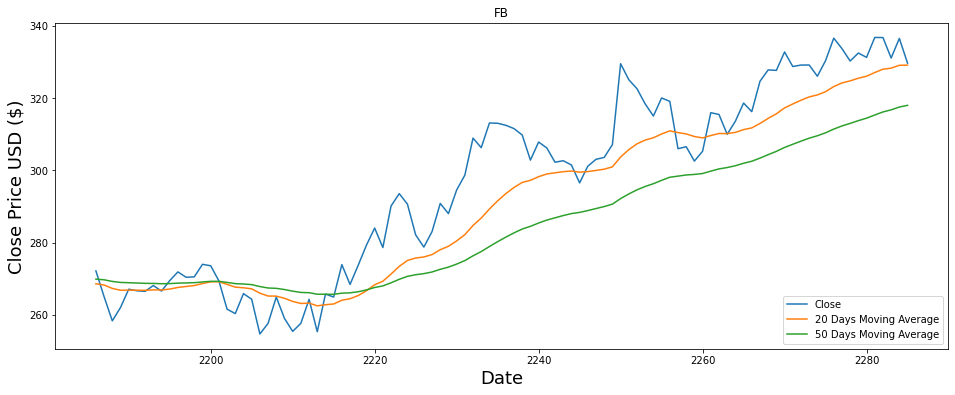

In [28]:
df1['Close'][-100:].plot(figsize=(16,6))
df1['Short_MV_Avg_Span'][-100:].plot(figsize=(16,6))
df1['Long_MV_Avg_Span'][-100:].plot(figsize=(16,6))
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize =18)
plt.legend(['Close', '20 Days Moving Average', '50 Days Moving Average'], loc = 'lower right')
plt.title(stock.upper())
plt.show

In [29]:
y = df1["Up_Down"].values

In [30]:
model = sm.Logit(y,X)

In [31]:
result =  model.fit()

Optimization terminated successfully.
         Current function value: 0.689102
         Iterations 4


In [32]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 2284
Model:                          Logit   Df Residuals:                     2278
Method:                           MLE   Df Model:                            5
Date:                Sat, 19 Jun 2021   Pseudo R-squ.:                0.003917
Time:                        10:51:51   Log-Likelihood:                -1573.9
converged:                       True   LL-Null:                       -1580.1
Covariance Type:            nonrobust   LLR p-value:                   0.02994
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.3775      0.127      2.965      0.003       0.128       0.627
Trend_Lag                                 -0.4222      0.186     -2.272      0.023      -0.786      -0.058
Short_MV_Avg_Span-Long_MV_Avg_Span_Lag    -0.0075      0.010     -0.779      0.436      -0.026       0.011
Close-Open_Lag                            -0.0069      0.024     -0.292      0.771      -0.054       0.040
High-Low_Lag                               0.0025      0.016      0.154      0.877      -0.029       0.034
Volume_Lag                                -1.5561      1.651     -0.942      0.346      -4.792       1.680
==========================================================================================================
"""

In [33]:
prediction = result.predict(X)

In [34]:
df1['Prediction_Caculated'] = pd.array(prediction)
df1['Prediction_indicator'] = pd.array([1 if i > cutoff else 0 for i in prediction])
#print (df1.iloc[-1,18],df1.iloc[-1,19],df1.iloc[-1,20])

In [35]:
#print(df1.loc[[i for i in range(len(df1)-20, len(df1)+2)],['Trend_Lag', 'Short_MV_Avg_Span-Long_MV_Avg_Span_Lag', 'Up_Down', 'Prediction_indicator']])

In [36]:
y = df1["Up_Down"].values

In [37]:
def confusion_matrix(act,pred):
    predtrans = ['Up' if i > cutoff else 'Down' for i in pred]
    actuals = ['Up' if i > 0 else 'Down' for i in act]
    confusion_matrix = pd.crosstab(pd.Series(actuals),
                                   pd.Series(predtrans),
                                   rownames = ["Actual"],
                                   colnames = ["Predict"]
                                  )
    return confusion_matrix

In [38]:
confusion_matrix(y,prediction)

Predict,Down,Up
Actual,,
Down,345,738
Up,327,874


In [39]:
z = confusion_matrix(y,prediction)
try:
    print((z.loc['Down','Down'] + z.loc['Up','Up']) / len(df1))
except:
    pass

0.5337127845884413


In [40]:
try:
    print( (z.loc['Down', 'Down']+ z.loc['Up','Up']) / (z.loc['Down', 'Down']+ z.loc['Up','Up'] + z.loc['Down','Up']) )
except:
    pass

0.6228921819110884


In [41]:
df1 = df1.assign(share=np.nan,money=np.nan)
#df1

In [42]:
diff_years = round((df1.iloc[-1,1] - df1.iloc[0,1])/np.timedelta64(1,'Y') + 0.5)   

In [43]:
#Simulate Investment transaction buy on opening when predict UP and sell daily average when predict DOWN

def buy_sell(open_price, sell_price,prediction, money, share):
    if prediction == 1 and money != 0:
        share =  money / open_price
        money = 0
    elif prediction == 0 and share != 0:
        money = share * sell_price
        share = 0
    else: pass
    return [money, share]
money = invest
share = 0
for i in range(len(df1)):
    [money, share] = buy_sell(df1.iloc[i,2],(df1.iloc[i,3]+df1.iloc[i,4])/2,df1.iloc[i,22], money, share)
    df1.iloc[i,23] = share
    df1.iloc[i,24] = money

In [44]:
#df1.tail(10)

In [45]:
print("\nIf ${:,.2f} was invested in [ {} ], and Just Hold and Not Trade for {:,} years, the ROI = ${:,.2f}".format( invest, stock.upper(), diff_years, invest/data.iloc[0, 0] * data.iloc[-1,0]))


If $100.00 was invested in [ FB ], and Just Hold and Not Trade for 10 years, the ROI = $795.55


In [46]:
print ("\nIf ${:,.2f} was invested {:2d} years ago, buy and sell according this script\'s recommandation, the ROI = ${:,.2f}".format(invest, diff_years, (money + (share * df1.iloc[-1,6]))))


If $100.00 was invested 10 years ago, buy and sell according this script's recommandation, the ROI = $968.44


In [47]:
df1_summary=df1[['Date', 'Up_Down','Prediction_indicator']].copy()
df1_summary['Stock Market Performance'] = df1_summary['Up_Down'].apply(lambda x: 'Up' if x > 0 else 'Down')
df1_summary['Scribe Predection'] = df1_summary['Prediction_indicator'].apply(lambda x: 'Up' if x > 0 else 'Down')
print (df1_summary[['Date','Stock Market Performance','Scribe Predection']].tail(15))

           Date Stock Market Performance Scribe Predection
2271 2021-05-28                     Down              Down
2272 2021-06-01                       Up                Up
2273 2021-06-02                       Up                Up
2274 2021-06-03                     Down                Up
2275 2021-06-04                       Up                Up
2276 2021-06-07                       Up              Down
2277 2021-06-08                     Down              Down
2278 2021-06-09                     Down                Up
2279 2021-06-10                       Up                Up
2280 2021-06-11                     Down              Down
2281 2021-06-14                       Up                Up
2282 2021-06-15                     Down              Down
2283 2021-06-16                     Down                Up
2284 2021-06-17                       Up                Up
2285 2021-06-18                     Down              Down


In [48]:
#print(df1.loc[[i for i in range(len(df1)-20, len(df1)+2)],['Date','Close','Trend_Lag', 'Short_MV_Avg_Span-Long_MV_Avg_Span_Lag']])

In [49]:
#print(df1.iloc[len(df1)-1,[1,7,10,11,12,13,14,15,16,17,18,19,20,21,22]])
#df1.info()

In [50]:
print ("\nToday [ %s ] actually went up," %stock.upper(), end = ' ') if (df1.iloc[-1,16] == 1) else print ("\nToday [ %s ] actually went down," %stock.upper(), end = " ")
print ("--- base on yesterday\'s data, ", end = '')
print ("We Predication [ %s ] should be going up." %stock.upper()) if (df1.iloc[-1,22] == 1) else print ("We Predicae [ %s ] should be going down." %stock.upper())
print ("\n=========> Actual and Predication MATCH <=========") if (df1.iloc[-1,16] == df1.iloc[-1,22]) else print("\n=========> Actual and Predication DO NOT match <=========")


Today [ FB ] actually went down, --- base on yesterday's data, We Predicae [ FB ] should be going down.

=========> Actual and Predication MATCH <=========


In [51]:
x_tran= df1[df1.Date.dt.year < 2021][['const','Trend_Lag','Short_MV_Avg_Span-Long_MV_Avg_Span_Lag','Close-Open_Lag','High-Low_Lag','Volume_Lag']]
y_train=df1[df1.Date.dt.year < 2021]["Up_Down"]
x_test= df1[df1.Date.dt.year >= 2021][['const','Trend_Lag','Short_MV_Avg_Span-Long_MV_Avg_Span_Lag','Close-Open_Lag','High-Low_Lag','Volume_Lag']]
y_test= df1[df1.Date.dt.year >= 2021]["Up_Down"]

In [52]:
model = sm.Logit(y_train,x_tran)
result=model.fit()

Optimization terminated successfully.
         Current function value: 0.689699
         Iterations 4


In [53]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Up_Down   No. Observations:                 2168
Model:                          Logit   Df Residuals:                     2162
Method:                           MLE   Df Model:                            5
Date:                Sat, 19 Jun 2021   Pseudo R-squ.:                0.002843
Time:                        10:51:52   Log-Likelihood:                -1495.3
converged:                       True   LL-Null:                       -1499.5
Covariance Type:            nonrobust   LLR p-value:                    0.1295
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.3469      0.130      2.675      0.007       0.093       0.601
Trend_Lag                                 -0.4072      0.191     -2.135      0.033      -0.781      -0.033
Short_MV_Avg_Span-Long_MV_Avg_Span_Lag    -0.0032      0.010     -0.310      0.757      -0.023       0.017
Close-Open_Lag                             0.0045      0.026      0.173      0.863      -0.047       0.056
High-Low_Lag                               0.0097      0.018      0.553      0.580      -0.025       0.044
Volume_Lag                                -1.5530      1.660     -0.936      0.349      -4.806       1.700
==========================================================================================================
"""

In [54]:
#print(result.summary().as_csv())

In [55]:
summary_list=result.summary().as_csv().split(",")

In [56]:
#print(summary_list)

In [57]:
print(summary_list[37:39])

['   -2.135', ' 0.033']


In [58]:
prediction = result.predict(x_test)
confusion_matrix(y_test, prediction)

Predict,Down,Up
Actual,,
Down,6,52
Up,0,58


In [59]:
z = confusion_matrix(y_test,prediction)

In [60]:
try:
    print ("\n=========> Prediction Accuracy Rate: %.4f <=========\n"  %((z.loc['Down','Down'] + z.loc['Up','Up']) / len(x_test)))
except:
    print ("\n=========> Predication effectiveness is not avairable <=========\n" )


=========> Prediction Accuracy Rate: 0.5517 <=========



In [61]:
prediction = result.predict(x_test)
now_up_down  = result.predict([1.0, df1.iloc[-1, 10], df1.iloc[-1, 19], df1.iloc[-1, 12], df1.iloc[-1, 14], df1.iloc[-1, 7]])
print ("\n=========> Current trend = %.4f,  " %now_up_down, end=' ')
print ("[ %s ] will go up! <=========" %stock.upper()) if now_up_down > cutoff else print ("[ %s ] will go down! <=========" %stock.upper()) 


=========> Current trend = 0.5709,   [ FB ] will go up! <=========


In [62]:
#print ("\n=========> Current trend = %.4f,  " %now_up_down, end=' ')
print ("\n ============> %s Days over %s Days Moving Average Indicator \n ============> %.4f....%.4f....%.4f....%.4f....%.4f....<=============" %(short_moving_average_span, long_moving_average_span, df1.iloc[-5,19], df1.iloc[-4,19], df1.iloc[-3,19], df1.iloc[-2,19],df1.iloc[-1,19]))
if df1.iloc[-1,19] * df1.iloc[-2,19] < 0:
    print ("\n ============> Warning, It Is the Time to Sell [ %s ] <=========" %stock.upper()) if df1.iloc[-1,19] < 0 else print ("\n ============> It Is the Time to Buy [ %s ] ! <=========" %stock.upper())
else:
    print ("\n ============> No Trading Waring at this time! <=============")


 ============> 20 Days over 50 Days Moving Average Indicator 
 ============> 11.7525....11.8344....11.5438....11.5523....11.1327....<=============

 ============> No Trading Waring at this time! <=============


In [63]:
#df1.to_csv('fb.csv', index = False)